Objetivo da Sessão: 

Familiarização com os classificadores K-nearest neighbour através do exemplo da base de dados Abalone familiarização com algumas funções disponíveis no Python que podem ser muito úteis para a análise de dados.

Este exemplo é composto por 4177 exemplos de medições de conchas Abalone para as quais
foram avaliadas sete medidas contínuas (comprimento, diâmetro, altura, peso total, peso
descascado, peso das vísceras, peso da casca), e dois valores discretos (sexo e número de
anéis). 

O número de anéis, somado de 1.5, corresponde ao número de anos da concha. 

O objetivo é prever o número de anéis com base nos restantes indicadores.

 ----

2 – Utilizando o Python, leia o ficheiro que descarregou. Dado que o ficheiro contém os dados
na forma CSV sugere-se a utilização da função read_csv da biblioteca Pandas.

In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

os.chdir('C:\\Users\\Rafael\\Desktop\\4º Ano\\2º Semestre\\PS\\Aulas Práticas')

data=pd.read_csv('abalone.data.txt')

----
3 – Visualize a dataframe resultante. 


Deverá notar que os nomes das colunas não estão
corretos. Poderá (e deverá) corrigir este problema inserindo no ficheiro dos dados uma
primeira linha com os nomes das colunas separados por vírgulas. Sugere-se a utilização dos
seguintes nomes:
- Sex
- Length
- Diameter
- Height
- Whole_weight
- Shucked_weight
- Viscera_weight
- Shell_weight
- Rings

Deverá assim obter uma dataframe com estes nomes nas respetivas colunas.

----

Uma vez que a base de dados inicialmente lida não tem os titulos das colunas definidos,
a função read_csv coloca como titulo das colunas da dataframe a primeira entrada de dados, o que é indesejável.

Esta correção foi feita manualmente, adicionando ao ficheiro de dados uma primeira linha com os títulos desejados e lendo novamente o ficheiro. Assim resulta a dataframe corrigida abaixo

In [2]:
data

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19


----

4 – Depois de obter a dataframe com os dados observe a distribuição dos dados pelas 29
classes que são o número de aneis das conchas.


Sugestões:
- df['Rings'].value_counts()
- df['Rings'].value_counts().sort_index() - para ver ordenado pelo número de rings

In [3]:
data['Rings'].value_counts().sort_index()


1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: Rings, dtype: int64

----
5 – Como os modelos que vamos desenvolver nesta aula utilizam exclusivamente dados
numéricos, é necessário transformar os valores não numéricos em valores numéricos. Como
poderá verificar, todas as colunas são numéricas exceto a coluna Sex que é uma string. Assim,
transforme os valores desta coluna em 1 se ‘M’ e 0 de ‘F’.
- Sugestão: apply(lambda x: 1 if x=='M' else 0)

Sendo que há ainda o valor 'I', definiu-se 1='F', 0,5='I' e 0='M'

In [4]:
def transf(s):
    if s=='M':
        return 0
    if s=='I':
        return 0.5
    return 1

data['Sex']=data['Sex'].apply(lambda x:transf(x))

In [5]:
data

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,1.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.5,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
5,0.5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
6,1.0,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
7,1.0,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
8,0.0,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
9,1.0,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19


----
6 – Como terá constatado, a distribuição dos dados por classes não é nada uniforme, existindo
classes com pouquíssimos exemplos. Como é evidente, não é viável trabalhar com classes que
são representadas por tão poucos exemplos como é o caso das classes 1, 2, 3, 21, 22, 23, etc.
Assim, vamos juntar as classes 1, 2, 3, 4 e 5 numa classe única de identificador 5 e as classes
20 a 29 numa classe de identificador 20.
Para que as classes fiquem com uma numeração “simpática” vamos ainda renumerar todas
elas entre 1 e 16 subtraindo 4 ao valor da classe original.
Deveremos então ficar com um conjunto de dados com 16 classes e com a seguinte
distribuição de dados:

Classe Número de exemplos
   - 1 189
   - 2 259
   - 3 391
   - 4 568
   - 5 689
   - 6 634
   - 7 487
   - 8 267
   - 9 203
   - 10 126
   - 11 103
   - 12 67
   - 13 58
   - 14 42
   - 15 32
   - 16 62


Sugestão: usar apply de uma função que faça a transformação do valor da classe.

In [6]:
def transfRings(r):
    if r<=5:
        return 1
    if r>=20:
        return 16
    return (r-4)

data['Rings']=data['Rings'].apply(lambda x:transfRings(x))
data['Rings'].value_counts().sort_index()

1     189
2     259
3     391
4     568
5     689
6     634
7     487
8     267
9     203
10    126
11    103
12     67
13     58
14     42
15     32
16     62
Name: Rings, dtype: int64

----
7 – Depois de criado este conjunto de dados é necessário dividir os dados em Predictors
(dados que servem para predizer a classe) e Class (coluna que indica a classe de cada
exemplo).
Os dados de treino podem ser os dados originais fazendo drop à coluna da classe (Rings) e os
dados da classe são simplesmente a coluna Rings.

In [7]:
#Classe de cada exemplo
classe=data['Rings']
#Dados para treino
predictors=data.drop(['Rings'],1) #(1=coluna).  Todos os dados que queremos utilizar para predizer a classe

In [8]:
classe

0       11
1        3
2        5
3        6
4        3
5        4
6       16
7       12
8        5
9       15
10      10
11       6
12       7
13       6
14       6
15       8
16       3
17       6
18       3
19       5
20       7
21       6
22       8
23       5
24       6
25       7
26       7
27       8
28      11
29       7
        ..
4147     7
4148     7
4149     2
4150     3
4151     2
4152     3
4153     4
4154     2
4155     2
4156     4
4157     4
4158     4
4159     5
4160     7
4161     7
4162     4
4163     3
4164     3
4165     3
4166     6
4167     5
4168     4
4169     6
4170     6
4171     4
4172     7
4173     6
4174     5
4175     6
4176     8
Name: Rings, Length: 4177, dtype: int64

In [9]:
predictors

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,1.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0.5,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
5,0.5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200
6,1.0,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300
7,1.0,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600
8,0.0,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650
9,1.0,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200


----
8 – Depois de separados em dois conjuntos há que dividir os dados em conjunto de treino e
conjunto de teste. O código abaixo permite fazer essa divisão criando um conjunto de treino
com 75% dos dados e um conjunto de teste com os restantes 25% onde X são os dados e Y a
classe correspondente.

- X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=0)

Para utilizar a função train_test_split () é necessário importar esta de sklear.model_selection

In [10]:
x_train,x_test,y_train,y_test=train_test_split(predictors,classe,random_state=0)

In [11]:
y_train

940      3
2688     4
1948     6
713      4
3743     8
2462     4
361      8
1519     6
1606     6
3478     3
779     11
3020     4
890      7
796      7
1530     7
3433     2
1254     3
3658     6
519      2
1867     5
1972     8
936      3
351     16
2638     3
3715     7
3517     7
4170     6
2858     7
1015     5
2308     7
        ..
2292     5
714      5
544      6
2745     4
3337    11
423      4
3219    12
659      7
797      5
755      9
2008     3
99       6
2496    11
1871     5
2046     3
2163     5
2893     4
537      3
1701     6
2897     6
2222     9
2135     8
2599     4
705      6
3468     7
1033     6
3264     8
1653     6
2607     5
2732     4
Name: Rings, Length: 3132, dtype: int64

----
9 – Está então na altura de se testar o primeiro classificador K-NN (K nearest neighbor).
Podemos obter este classificador com o código:

É necessário imporar a função KNeighborsClassifier de sklearn.neighbors

In [12]:
knn=KNeighborsClassifier(n_neighbors=5) # Criação de um KNN com K=5
knn.fit(x_train,y_train) # treinar o classificador com dados e classe de treino
knn.score(x_test,y_test) # avaliar os resultados com dados e classe de teste

0.22488038277511962

In [13]:
knn.score(x_train,y_train)

0.460727969348659

----
10 – Como poderá constatar, a precisão do classificado é muito baixa (na ordem dos 24%).
Esta baixa precisão deve-se ao elevado número de classes que foram consideradas (16). Como
se pode constatar ma literatura deste exemplo, os resultados obtidos por diversos estudos
são na ordem dos 65% mas utilizando apenas três classes: 1..8, 9..10, 11..29. Vamos então
refazer o reordenamento das classes para estas três classes que numeraremos de 1 a 3.


Para realizar esta tarefa é correr todo o código anterior, alterando a transformação da classe Rings

In [14]:
data2=pd.read_csv('abalone.data.txt')

data2['Sex']=data2['Sex'].apply(lambda x:transf(x))

def transfRings2(r):
    if r<=8:
        return 1
    if r>=11:
        return 3
    return 2

data2['Rings']=data2['Rings'].apply(lambda x:transfRings2(x))

data2['Rings'].value_counts().sort_index()

1    1407
2    1323
3    1447
Name: Rings, dtype: int64

-------
11 – Com os dados reorganizados em três classes refaça o classificador e veja qual a precisão
obtida com o conjunto de teste e com o conjunto de treino (deverá ser na ordem dos 63%).

In [15]:
#Classe de cada exemplo
classe2=data2['Rings']
#Dados para treino
predictors2=data2.drop(['Rings'],1) #(1=coluna).  Todos os dados que queremos utilizar para predizer a classe

#Divisão em conjuntos de treino e conjuntos de teste
x2_train,x2_test,y2_train,y2_test=train_test_split(predictors2,classe2,random_state=0)

#Criação de um novo classificador K-NN para avaliação com as novas classes
knn2=KNeighborsClassifier(n_neighbors=5) # Criação de um KNN com K=5
knn2.fit(x2_train,y2_train) # treinar o classificador com dados e classe de treino
print("Precisão com conjunto de teste", knn2.score(x2_test,y2_test)) # treinar o classificador com dados e classe de treino
print("Precisão com conjunto de treino", knn2.score(x2_train,y2_train))# avaliar os resultados com dados e classe de teste

Precisão com conjunto de teste 0.6210526315789474
Precisão com conjunto de treino 0.7455300127713921


-----
12 – Construa a matriz de confusão para o classificador anterior.
- Sugestão: utilize a função confusion_matrix da biblioteca sklearn.metrics

In [16]:
y2_predict= knn2.predict(x2_test)
print('Matriz de confusão para conjunto de teste')
print(confusion_matrix(y2_test, y2_predict))

y2_predict= knn2.predict(x2_train)
print('Matriz de confusão para conjunto de treino')
print(confusion_matrix(y2_train, y2_predict))


Matriz de confusão para conjunto de teste
[[297  69  10]
 [ 73 138  80]
 [ 37 127 214]]
Matriz de confusão para conjunto de treino
[[865 143  23]
 [171 709 152]
 [ 82 226 761]]


----
13 – Repita o classificador anterior com K=1. Justifique a precisão obtida com o conjunto de
treino e com o conjunto de teste.


In [17]:
#Criação de um novo classificador K-NN para avaliação com as novas classes
knn3=KNeighborsClassifier(n_neighbors=1) # Criação de um KNN com K=5
knn3.fit(x2_train,y2_train) 
print("Precisão com conjunto de teste", knn3.score(x2_test,y2_test)) # treinar o classificador com dados e classe de treino
print("Precisão com conjunto de treino", knn3.score(x2_train,y2_train))# avaliar os resultados com dados e classe de teste

Precisão com conjunto de teste 0.5770334928229665
Precisão com conjunto de treino 1.0


Com k=1, o mais próximo será o próprio, logo acerta a classe  e o score para os conjuntos de treino será 100%

Com k=5, aprende o exemplo e os vizinhos, o que piora o desempenho. 

Com o aumento de k generaliza-se, perde-se capacidade de classificar corretamente todo o conjunto de treino mas o classificador será melhor.



----
14 – Analise a precisão obtida com o conjunto de treino e com o conjunto de teste variando
o K entre 1 e 15 (só valores impares, claro). Se possível faça um gráfico com os valores de
precisão para ambas as situações em função de K.
- Sugestão: vai necessitar da biblioteca pyplot (import matplotlib.pyplot as plt) da qual poderá
utilizar a função plot para criar os gráficos e a função show para mostrar os gráficos
produzidos.

In [18]:
#Vetores para armazenar os resultados das iterações do ciclo for
N=[]
pTeste=[]
pTreino=[]

for n in range(1,17,2): #17 porque i<limite
    knn=KNeighborsClassifier(n_neighbors=n) # Criação de um KNN com K=5
    knn.fit(x2_train,y2_train) # treinar o classificador com dados e classe de treino
    pTeste.append(knn.score(x2_test,y2_test))
    pTreino.append(knn.score(x2_train,y2_train))
    N.append(n)

#print(pTreino)
#print(pTeste)

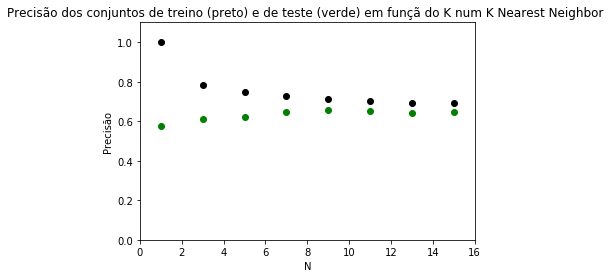

In [19]:
#Gerar o gráfico pretendido

#plt.scatter(N,pTreino)
#plt.scatter(N,pTeste)
plt.plot(N,pTreino,'ok',
         N,pTeste, 'og') #o para fazer scatter. assim é possível ter tudo na mesma função
plt.title('Precisão dos conjuntos de treino (preto) e de teste (verde) em funçã do K num K Nearest Neighbor ')
plt.xlabel('N')
plt.ylabel('Precisão')
plt.axis([0,16,0,1.1]) #alterar a janela de visualização. [liminf_x,limsup_x,liminf_y,limsup_y]
plt.show()